---
 < 범죄 발생량에 영향를 주는 요인은 무엇일까? >
    - CCTV 설치와 범죄율 감소는 상관이 있을것인가 ?
      - 년도별 서울시 구별 cctv 변화량 확인
      - 년도별 서울시 범죄 발생 변화량 확인(5대범죄)
      - 년도별 cctv와 범죄발생 상관관계(그래프) 비교

# 

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#데이터 불러오기

data_crime='./5대+범죄+발생현황_20230105161648.xlsx'
data_cctv='./서울시CCTV설치운영현황(자치구)_연도별_220630기준.csv'
crime_DF=pd.read_excel(data_crime)
cctv_DF=pd.read_csv(data_cctv, encoding='cp949')

c:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
#데이터 확인
crime_DF.head()


,자치구별(1),자치구별(2),2014,2015,2016,2017,2018,2019,2020,2021
0,자치구별(1),자치구별(2),합계,합계,합계,합계,합계,합계,합계,합계
1,자치구별(1),자치구별(2),발생,발생,발생,발생,발생,발생,발생,발생
2,합계,소계,130674,126401,117839,107835,101948,103668,92679,80445
3,NaN,종로구,5021,4705,4459,4057,3690,3846,3102,2712
4,NaN,중구,5231,4954,4584,4184,4030,4327,3411,2861


In [5]:
cctv_DF.head()

,구분,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
0,계,"85,242","5,001","3,758","4,011","6,659","8,812","11,569","10,880","12,541","11,561","8,614","1,836"
1,종로구,"1,855",21,537,120,161,134,165,166,69,254,76,152
2,중 구,"2,447",130,87,77,236,240,372,386,155,361,403,0
3,용산구,"2,611",105,234,125,221,298,351,125,307,617,228,NaN
4,성동구,"3,922",321,211,111,327,255,973,415,491,472,283,63


In [5]:
''' 
1. 전처리 
    1) crime_DF 
        행 : row0,1,2 삭제  구별 변화량 확인 >> 년도별 합계 사용x
        열 : column0 삭제 , '자치구별(2)' 인덱스로 설정
        info 확인 : 데이터타입 변경
'''

" \n1. 전처리 \n    1) crime_DF \n        행 : row0,1,2 삭제  구별 변화량 확인 >> 년도별 합계 사용x\n        열 : column0 삭제 , '자치구별(2)' 인덱스로 설정\n        info 확인 : 데이터타입 변경\n"

In [6]:
# 행0,1,2 삭제
crime_DF.drop([0,1,2],axis=0,inplace=True)

crime_DF.head()

,자치구별(1),자치구별(2),2014,2015,2016,2017,2018,2019,2020,2021
3,NaN,종로구,5021,4705,4459,4057,3690,3846,3102,2712
4,NaN,중구,5231,4954,4584,4184,4030,4327,3411,2861
5,NaN,용산구,3799,3820,4137,4060,3411,3313,2969,2381
6,NaN,성동구,3582,3358,3026,2767,2457,2512,2362,2112
7,NaN,광진구,6268,5909,5322,4646,3915,4011,3601,3087


In [7]:
# 열 '자치구별(1)'삭제

crime_DF.drop('자치구별(1)',axis=1,inplace=True)
crime_DF.head()

,자치구별(2),2014,2015,2016,2017,2018,2019,2020,2021
3,종로구,5021,4705,4459,4057,3690,3846,3102,2712
4,중구,5231,4954,4584,4184,4030,4327,3411,2861
5,용산구,3799,3820,4137,4060,3411,3313,2969,2381
6,성동구,3582,3358,3026,2767,2457,2512,2362,2112
7,광진구,6268,5909,5322,4646,3915,4011,3601,3087


In [8]:
# '자치구별(2)'컬럼  이름 바꾸고 인덱스로 설정
crime_DF.rename(columns={'자치구별(2)':'자치구(25)'},inplace=True)
crime_DF.set_index('자치구(25)',inplace=True)

crime_DF.head()

,2014,2015,2016,2017,2018,2019,2020,2021
자치구(25),,,,,,,,
종로구,5021,4705,4459,4057,3690,3846,3102,2712
중구,5231,4954,4584,4184,4030,4327,3411,2861
용산구,3799,3820,4137,4060,3411,3313,2969,2381
성동구,3582,3358,3026,2767,2457,2512,2362,2112
광진구,6268,5909,5322,4646,3915,4011,3601,3087


In [9]:
crime_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2014    25 non-null     object
 1   2015    25 non-null     object
 2   2016    25 non-null     object
 3   2017    25 non-null     object
 4   2018    25 non-null     object
 5   2019    25 non-null     object
 6   2020    25 non-null     object
 7   2021    25 non-null     object
dtypes: object(8)
memory usage: 1.8+ KB


In [10]:
crime_DF.isnull().sum()

2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
dtype: int64

In [11]:
# 데이터 타입 변경하기
crime_DF=crime_DF.astype('int')
crime_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2014    25 non-null     int32
 1   2015    25 non-null     int32
 2   2016    25 non-null     int32
 3   2017    25 non-null     int32
 4   2018    25 non-null     int32
 5   2019    25 non-null     int32
 6   2020    25 non-null     int32
 7   2021    25 non-null     int32
dtypes: int32(8)
memory usage: 1000.0+ bytes


In [12]:
''' 
1. 전처리 
    2) cctvDF 
        행 : 행0 삭제
        열 : 열 '2022년'삭제, 행0 인덱스로 변경 
'''
cctv_DF.head(3)

,구분,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
0,계,"85,242","5,001","3,758","4,011","6,659","8,812","11,569","10,880","12,541","11,561","8,614","1,836"
1,종로구,"1,855",21,537,120,161,134,165,166,69,254,76,152
2,중 구,"2,447",130,87,77,236,240,372,386,155,361,403,0


In [13]:
# 행0 삭제

cctv_DF.drop(0,inplace=True)
cctv_DF.head(3)

,구분,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
1,종로구,"1,855",21,537,120,161,134,165,166,69,254,76,152
2,중 구,"2,447",130,87,77,236,240,372,386,155,361,403,0
3,용산구,"2,611",105,234,125,221,298,351,125,307,617,228,NaN


In [14]:
# 열 ('2022년') 삭제

cctv_DF.drop('2022년',axis=1,inplace=True)
cctv_DF.head(3)

,구분,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
1,종로구,"1,855",21,537,120,161,134,165,166,69,254,76
2,중 구,"2,447",130,87,77,236,240,372,386,155,361,403
3,용산구,"2,611",105,234,125,221,298,351,125,307,617,228


In [15]:
# 컬럼명 변경
cctv_DF.rename(columns={'구분':'자치구(25)','2013년 이전\n설치된 CCTV':'2013이전'},inplace=True)
cctv_DF.head(3)

,자치구(25),총계,2013이전,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
1,종로구,"1,855",21,537,120,161,134,165,166,69,254,76
2,중 구,"2,447",130,87,77,236,240,372,386,155,361,403
3,용산구,"2,611",105,234,125,221,298,351,125,307,617,228


In [16]:
# 자치구(25) 컬럼을 인덱스로 변경

cctv_DF.set_index('자치구(25)',inplace=True)
cctv_DF.head(3)

,총계,2013이전,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
자치구(25),,,,,,,,,,,
종로구,"1,855",21,537,120,161,134,165,166,69,254,76
중 구,"2,447",130,87,77,236,240,372,386,155,361,403
용산구,"2,611",105,234,125,221,298,351,125,307,617,228


In [17]:
cctv_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   총계      25 non-null     object
 1   2013이전  25 non-null     object
 2   2013년   25 non-null     object
 3   2014년   25 non-null     object
 4   2015년   25 non-null     object
 5   2016년   25 non-null     object
 6   2017년   25 non-null     object
 7   2018년   25 non-null     object
 8   2019년   25 non-null     object
 9   2020년   25 non-null     object
 10  2021년   25 non-null     object
dtypes: object(11)
memory usage: 2.3+ KB


In [18]:
# 전체 데이터타입 int 변경 + 결측치 채우기 (0)
# astype  : 오류발생

cctv_DF.astype('int')


ValueError: invalid literal for int() with base 10: '1,855'

In [19]:
cctv_DF

,총계,2013이전,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
자치구(25),,,,,,,,,,,
종로구,"1,855",21,537,120,161,134,165,166,69,254,76
중 구,"2,447",130,87,77,236,240,372,386,155,361,403
용산구,"2,611",105,234,125,221,298,351,125,307,617,228
성동구,"3,922",321,211,111,327,255,973,415,491,472,283
광진구,"3,214",46,85,177,95,40,666,460,712,190,739
동대문구,"2,631",4,14,16,115,804,814,201,218,223,219
중랑구,"3,918",345,253,88,149,178,174,215,1059,976,471
성북구,"4,611",137,170,229,322,594,811,867,714,253,407
강북구,"2,800",0,21,17,89,218,5,379,980,573,436


In [ ]:
# 총계컬럼, [구로구,2013이전]  -> 자리표시 ' , '


,총계,2013이전,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
자치구(25),,,,,,,,,,,
종로구,"1,855",21,537,120,161,134,165,166,69,254,76
중 구,"2,447",130,87,77,236,240,372,386,155,361,403
용산구,"2,611",105,234,125,221,298,351,125,307,617,228
성동구,"3,922",321,211,111,327,255,973,415,491,472,283
광진구,"3,214",46,85,177,95,40,666,460,712,190,739
동대문구,"2,631",4,14,16,115,804,814,201,218,223,219
중랑구,"3,918",345,253,88,149,178,174,215,1059,976,471
성북구,"4,611",137,170,229,322,594,811,867,714,253,407
강북구,"2,800",0,21,17,89,218,5,379,980,573,436


In [20]:
# 자리표시 제거 + int수정

cctv_DF=cctv_DF.applymap(lambda v : int(''.join(v.split(','))) if ',' in v else int(v))
cctv_DF.head(3), cctv_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   총계      25 non-null     int64
 1   2013이전  25 non-null     int64
 2   2013년   25 non-null     int64
 3   2014년   25 non-null     int64
 4   2015년   25 non-null     int64
 5   2016년   25 non-null     int64
 6   2017년   25 non-null     int64
 7   2018년   25 non-null     int64
 8   2019년   25 non-null     int64
 9   2020년   25 non-null     int64
 10  2021년   25 non-null     int64
dtypes: int64(11)
memory usage: 2.3+ KB


(           총계  2013이전  2013년  2014년  2015년  2016년  2017년  2018년  2019년  2020년  \
 자치구(25)                                                                         
 종로구      1855      21    537    120    161    134    165    166     69    254   
 중 구      2447     130     87     77    236    240    372    386    155    361   
 용산구      2611     105    234    125    221    298    351    125    307    617   
 
          2021년  
 자치구(25)         
 종로구         76  
 중 구        403  
 용산구        228  ,
 None)

In [ ]:
# 단순히 CCTV 수와 범죄발생을 비교할 수 있을까? 

# 구별 CCTV 증가량 -> 다음 해 발생 범죄 로 비교하자

In [22]:
# crime_DF 수정 : 년도별 증감량 계산 필요 -> 추가하기
crime_DF.head()

,2014,2015,2016,2017,2018,2019,2020,2021
자치구(25),,,,,,,,
종로구,5021,4705,4459,4057,3690,3846,3102,2712
중구,5231,4954,4584,4184,4030,4327,3411,2861
용산구,3799,3820,4137,4060,3411,3313,2969,2381
성동구,3582,3358,3026,2767,2457,2512,2362,2112
광진구,6268,5909,5322,4646,3915,4011,3601,3087


In [69]:

for i in range(2015,2022): crime_DF[f'{i}년증감']=crime_DF[f'{i}']-crime_DF[f'{i-1}']

crime_DF.head()

,2014,2015,2016,2017,2018,2019,2020,2021,2015년증감,2016년증감,2017년증감,2018년증감,2019년증감,2020년증감,2021년증감
자치구(25),,,,,,,,,,,,,,,
종로구,5021,4705,4459,4057,3690,3846,3102,2712,-316,-246,-402,-367,156,-744,-390
중구,5231,4954,4584,4184,4030,4327,3411,2861,-277,-370,-400,-154,297,-916,-550
용산구,3799,3820,4137,4060,3411,3313,2969,2381,21,317,-77,-649,-98,-344,-588
성동구,3582,3358,3026,2767,2457,2512,2362,2112,-224,-332,-259,-310,55,-150,-250
광진구,6268,5909,5322,4646,3915,4011,3601,3087,-359,-587,-676,-731,96,-410,-514


In [70]:
crime_change=crime_DF.iloc[:,8:15]
crime_change.head()

,2015년증감,2016년증감,2017년증감,2018년증감,2019년증감,2020년증감,2021년증감
자치구(25),,,,,,,
종로구,-316,-246,-402,-367,156,-744,-390
중구,-277,-370,-400,-154,297,-916,-550
용산구,21,317,-77,-649,-98,-344,-588
성동구,-224,-332,-259,-310,55,-150,-250
광진구,-359,-587,-676,-731,96,-410,-514


In [72]:
cctv_DF.head()
#15년도 부터 사용

,총계,2013이전,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
자치구(25),,,,,,,,,,,
종로구,1855,21,537,120,161,134,165,166,69,254,76
중 구,2447,130,87,77,236,240,372,386,155,361,403
용산구,2611,105,234,125,221,298,351,125,307,617,228
성동구,3922,321,211,111,327,255,973,415,491,472,283
광진구,3214,46,85,177,95,40,666,460,712,190,739


In [73]:
cctv_DF=cctv_DF.iloc[:,4:]
cctv_DF.head()

,2015년,2016년,2017년,2018년,2019년,2020년,2021년
자치구(25),,,,,,,
종로구,161,134,165,166,69,254,76
중 구,236,240,372,386,155,361,403
용산구,221,298,351,125,307,617,228
성동구,327,255,973,415,491,472,283
광진구,95,40,666,460,712,190,739


In [180]:
cctv_DF.head()


,2015년,2016년,2017년,2018년,2019년,2020년,2021년,평균증감
자치구(25),,,,,,,,
종로구,161,134,165,166,69,254,76,146
중 구,236,240,372,386,155,361,403,308
용산구,221,298,351,125,307,617,228,307
성동구,327,255,973,415,491,472,283,459
광진구,95,40,666,460,712,190,739,415


In [181]:
crime_change.head()

,2015년증감,2016년증감,2017년증감,2018년증감,2019년증감,2020년증감,2021년증감,평균증감
자치구(25),,,,,,,,
종로구,-316,-246,-402,-367,156,-744,-390,-330
중구,-277,-370,-400,-154,297,-916,-550,-339
용산구,21,317,-77,-649,-98,-344,-588,-203
성동구,-224,-332,-259,-310,55,-150,-250,-210
광진구,-359,-587,-676,-731,96,-410,-514,-454


In [ ]:
# cctv 15년 증감 >> crime 16년 증감에 영향
# cctv columns :[ 2015년	    2016년	    2017년	    2018년	    2019년	    2020년  ]사용
# crime columns:[ 2016년증감	2017년증감	2018년증감	2019년증감	2020년증감	2021년증감	] 사용

In [209]:
cctvDF=cctv_DF.drop(columns=['2021년'])

cctvDF.head()

,2015년,2016년,2017년,2018년,2019년,2020년,평균증감
자치구(25),,,,,,,
종로구,161,134,165,166,69,254,146
중 구,236,240,372,386,155,361,308
용산구,221,298,351,125,307,617,307
성동구,327,255,973,415,491,472,459
광진구,95,40,666,460,712,190,415


In [212]:
crimeDF=crime_change.drop(columns='2015년증감')
crimeDF.columns=cctvDF.columns
crimeDF.head()

# 범죄 발생은 익년도 값임을 잊지 말자

,2015년,2016년,2017년,2018년,2019년,2020년,평균증감
자치구(25),,,,,,,
종로구,-246,-402,-367,156,-744,-390,-330
중구,-370,-400,-154,297,-916,-550,-339
용산구,317,-77,-649,-98,-344,-588,-203
성동구,-332,-259,-310,55,-150,-250,-210
광진구,-587,-676,-731,96,-410,-514,-454


---
## 데이터 확인

 >> DataFrame  
 
    - 자치구별 CCTV 증감 데이터 : cctvDF   / 기간 : 2015 - 2021년  
    
    - 자치구별 5대 범죄 증감 데이터 : crime_change    / 기간 : 2016 - 2022년
      - 범죄 증감은 익년도 값임.

In [90]:
# 폰트설정


import matplotlib 
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'C:\Windows\Fonts\malgun.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)



C:\Users\user\AppData\Local\Temp\ipykernel_13476\1748873538.py:7: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


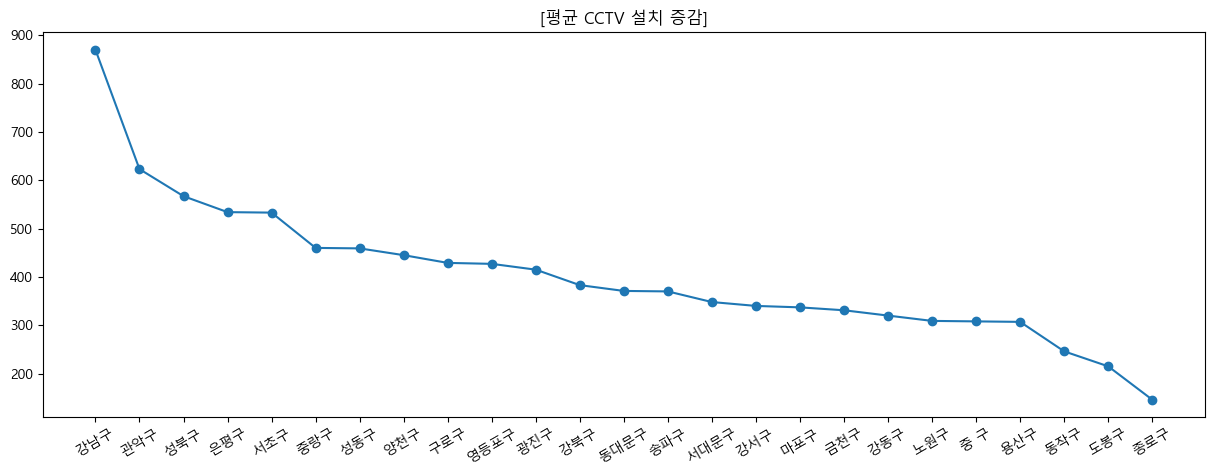

In [220]:
plt.subplots(figsize= (15,5))
plt.plot(cctvDF['평균증감'].sort_values(ascending=False),'o-')
plt.xticks(cctvDF.index, rotation=30)
plt.title('[평균 CCTV 설치 증감]')
plt.show()

---
 > (6년간) 신규 CCTV설치량의 평균값이 큰 자치구 : 강남구 >> 관악구 > 성북구 > 은평구 > 서초구   

 > (6년간) 신규 CCTV설치량의 평균값이 작은 자치구 : 종로구 < 도봉구 < 동작구 < 용산구  
   
     

     
 


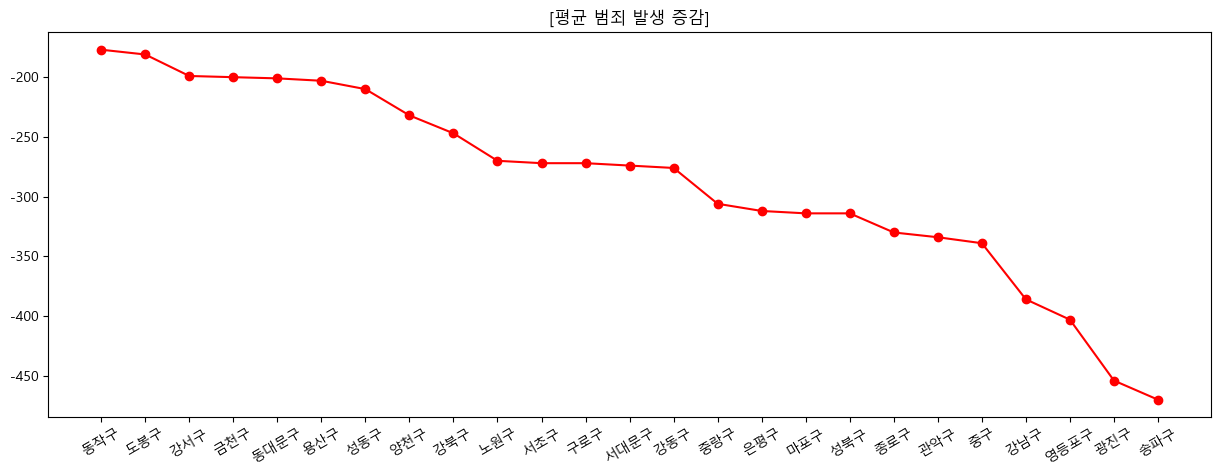

In [227]:
plt.subplots(figsize= (15,5))
plt.plot(crimeDF['평균증감'].sort_values(ascending=False),'ro-')
plt.xticks(crimeDF.index, rotation=30)
plt.title('[평균 범죄 발생 증감]')
plt.show()

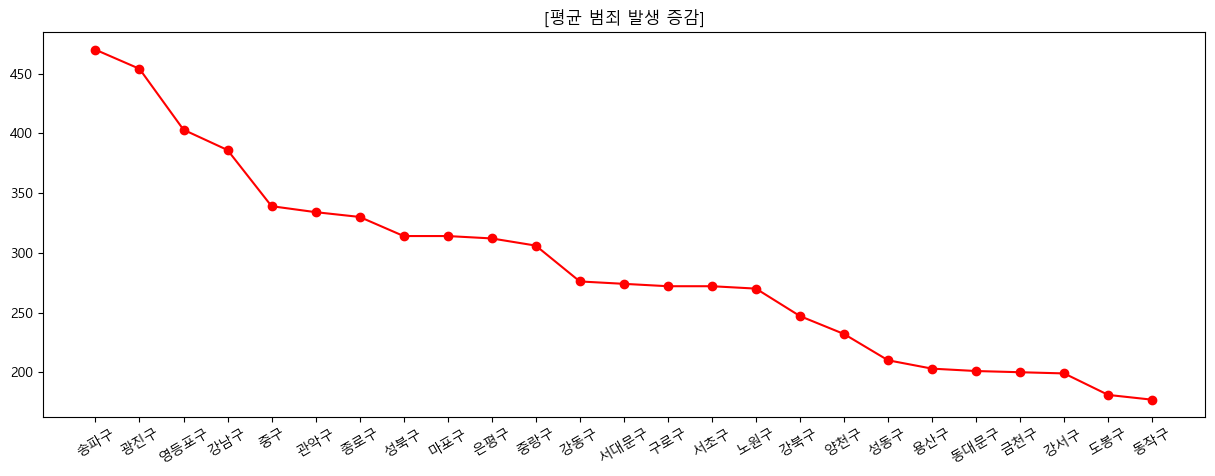

In [230]:
plt.subplots(figsize= (15,5))
plt.plot(crimeDF['평균증감'].sort_values()*-1,'ro-')
plt.xticks(crimeDF.index, rotation=30)
plt.title('[평균 범죄 발생 증감]')
plt.show()

 > (6년) 범죄 발생감소량의 평균값이 큰 자치구 : 송파구 > 광진구 > 영등포구 > 강남구 > 중구  

 > (6년) 범죄 발생감소량의 평균값이 작은 자치구 : 동작구 < 도봉구 < 강서구 < 금천구 < 동대문구 < 용산구 < 성동구  
   
   


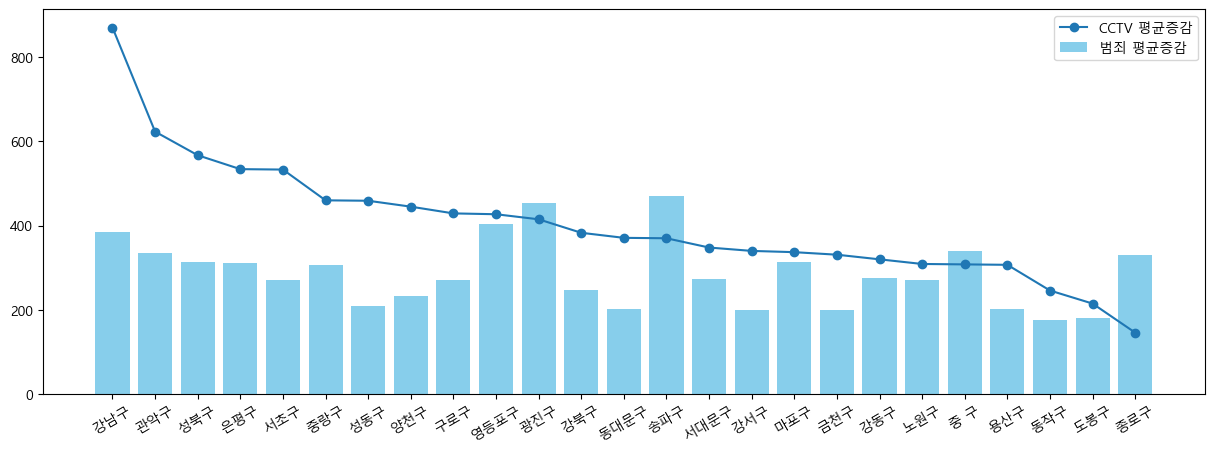

In [254]:
# 하나의 그래프로 확인 


plt.subplots(figsize= (15,5))
plt.plot(cctvDF['평균증감'].sort_values(ascending=False),'o-',label='CCTV 평균증감')

plt.bar(crimeDF['평균증감'].index, crimeDF['평균증감']*-1,color='skyblue',label='범죄 평균증감')
plt.xticks(cctvDF.index, rotation=30)
plt.legend()
plt.show()
# plt.xticks(crime.index, rotation=30)

In [255]:
crimeDF['평균증감'].corr(cctvDF['평균증감'])
#상관분석

-0.35389950376703383

---
 - 평균 cctv 설치 수와 범죄발생 수는 약한 음의 상관관계  
 
    - 년도별로 좁혀서 확인해보자

In [259]:
crimeDF.head(3)

,2015년,2016년,2017년,2018년,2019년,2020년,평균증감
자치구(25),,,,,,,
종로구,-246,-402,-367,156,-744,-390,-330
중 구,-370,-400,-154,297,-916,-550,-339
용산구,317,-77,-649,-98,-344,-588,-203


In [260]:
cctvDF.head()

,2015년,2016년,2017년,2018년,2019년,2020년,평균증감
자치구(25),,,,,,,
종로구,161,134,165,166,69,254,146
중 구,236,240,372,386,155,361,308
용산구,221,298,351,125,307,617,307
성동구,327,255,973,415,491,472,459
광진구,95,40,666,460,712,190,415


In [339]:
#cctv 강남구 >> 관악구 > 성북구 > 은평구 > 서초구   년도별 cctv-범죄 DF만들기

gu_list=['강남구','관악구','성북구','은평구','서초구']

for i in range(len(gu_list)):
    j=gu_list[i]
    globals()[f'cctv_top{i}']=pd.DataFrame(cctvDF.loc[j])
    globals()[f'cctv_top{i}']['범죄']=crimeDF.loc[j]*(-1)


In [ ]:
fig=plt.figure()
for i in range(1,26):
    globals()[f'axes{i}']=fig.add_subplot(5,5,i)
    globals()[f'axes{i}'].plot(globals()[f'{i}'].index,globals()[f'DF{i}'].values)
    globals()[f'axes{i}'].xaxis.set_visible(False)
    globals()[f'axes{i}'].yaxis.set_visible(False)

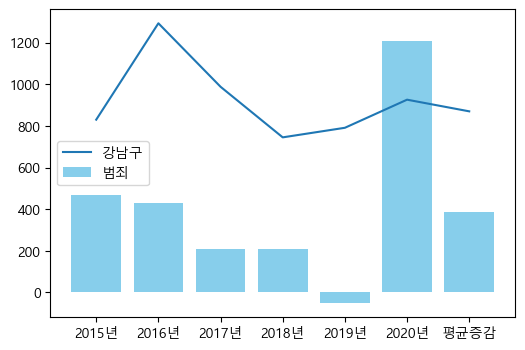

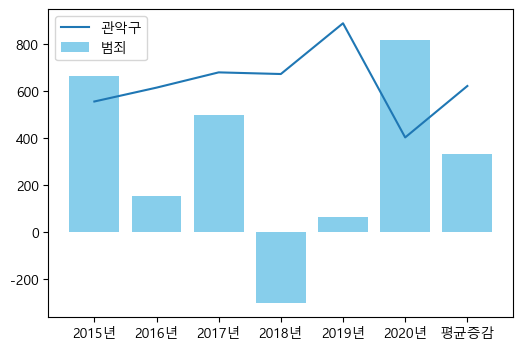

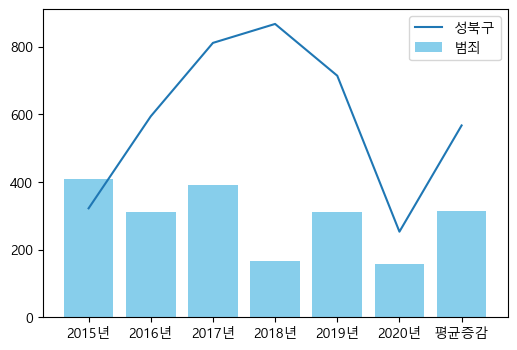

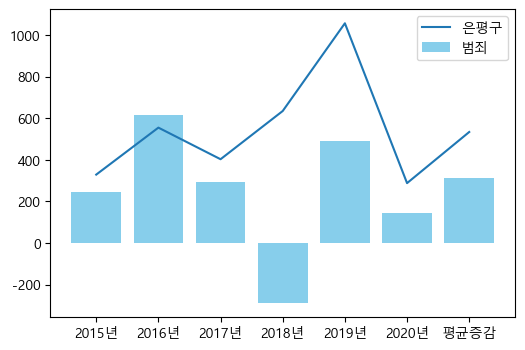

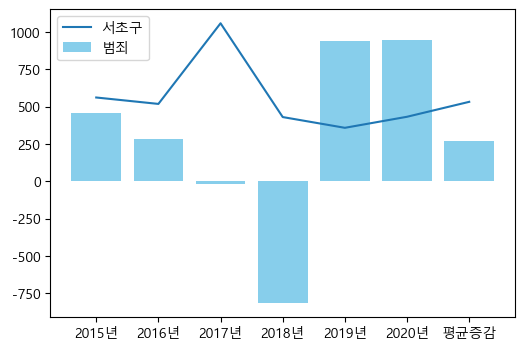

In [408]:
#5개 자치구 그래프 비교

plt.subplots(figsize= (6,4))
plt.plot(cctv_top0[gu_list[0]],label=gu_list[0])
plt.bar(cctv_top0['범죄'].index, cctv_top0['범죄'],color='skyblue',label='범죄')
plt.legend()

plt.subplots(figsize= (6,4))
plt.plot(cctv_top1[gu_list[1]],label=gu_list[1])
plt.bar(cctv_top1['범죄'].index, cctv_top1['범죄'],color='skyblue',label='범죄')
plt.legend()

plt.subplots(figsize= (6,4))
plt.plot(cctv_top2[gu_list[2]],label=gu_list[2])
plt.bar(cctv_top2['범죄'].index, cctv_top2['범죄'],color='skyblue',label='범죄')
plt.legend()

plt.subplots(figsize= (6,4))
plt.plot(cctv_top3[gu_list[3]],label=gu_list[3])
plt.bar(cctv_top3['범죄'].index, cctv_top3['범죄'],color='skyblue',label='범죄')
plt.legend()

plt.subplots(figsize= (6,4))
plt.plot(cctv_top4[gu_list[4]],label=gu_list[4])
plt.bar(cctv_top4['범죄'].index, cctv_top4['범죄'],color='skyblue',label='범죄')
plt.legend()
plt.show()

In [473]:
print('CCTV증가량과 범죄증가량의 CORR',end='\n\n')
for i in range(len(gu_list)):

    print( f'========={gu_list[i]}========= ' )
    print(globals()[f"cctv_top{i}"][gu_list[i]].corr( globals()[f'cctv_top{i}']['범죄'] ), end='\n\n')

CCTV증가량과 범죄증가량의 CORR

=========강남구========= 
0.20412858461269018

=========관악구========= 
-0.6527626639877049

=========성북구========= 
0.020986829972309322

=========은평구========= 
0.22104557450501527

=========서초구========= 
-0.2649283732885163



---
### 결론 

- 지역별 평균 CCTV 설치 증가량과 평균 범죄 감소량과의 상관관계는 매우 약한 음의 상관관계  
    - 그러나 년도 별로 확인할 경우, 상관계수가 매우 다양하게 나타남 
        - 따라서 CCTV 설치와 범죄감소는 상관관계 없음

- 초기 가설과 비교
    - CCTV 설치량이 증가하는 지역은 범죄 감소량이 클 것이다  => 상관관계


- 분석에 대한 복기
    - 데이터 > 5대 범죄 발생 현황 : 5대 강력범죄( 살인 / 강도 / 강간·강제추행/절도 / 폭력)만 해당, 
    - 아쉬운부분 :

        

In [ ]:
# 결